In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import StackingRegressor

Identifying Variables

In [97]:
df = pd.read_csv("../data/cleaned.csv")

# remove the years 2020 and 2021 due to abnormal volatility (COVID-19)
df = df[~df['Year'].isin([2020, 2021])]

In [98]:
# define target variable
target = "GDP growth (annual %)"

# define predictor variables
predictors = [
    "Unemployment, total (% of total labor force) (national estimate)",
    "Imports of goods and services (% of GDP)",
    "Foreign direct investment, net outflows (% of GDP)",
    "Domestic credit to private sector (% of GDP)",
    "Population growth (annual %)",
    "Inflation, consumer prices (annual %)",
    "Real interest rate (%)",
    "General government final consumption expenditure (% of GDP)",
    "Consumer confidence"
]

# select predictors and target from dataframe
X = df[predictors]
y = df[target]

Exploritory Data Analysis

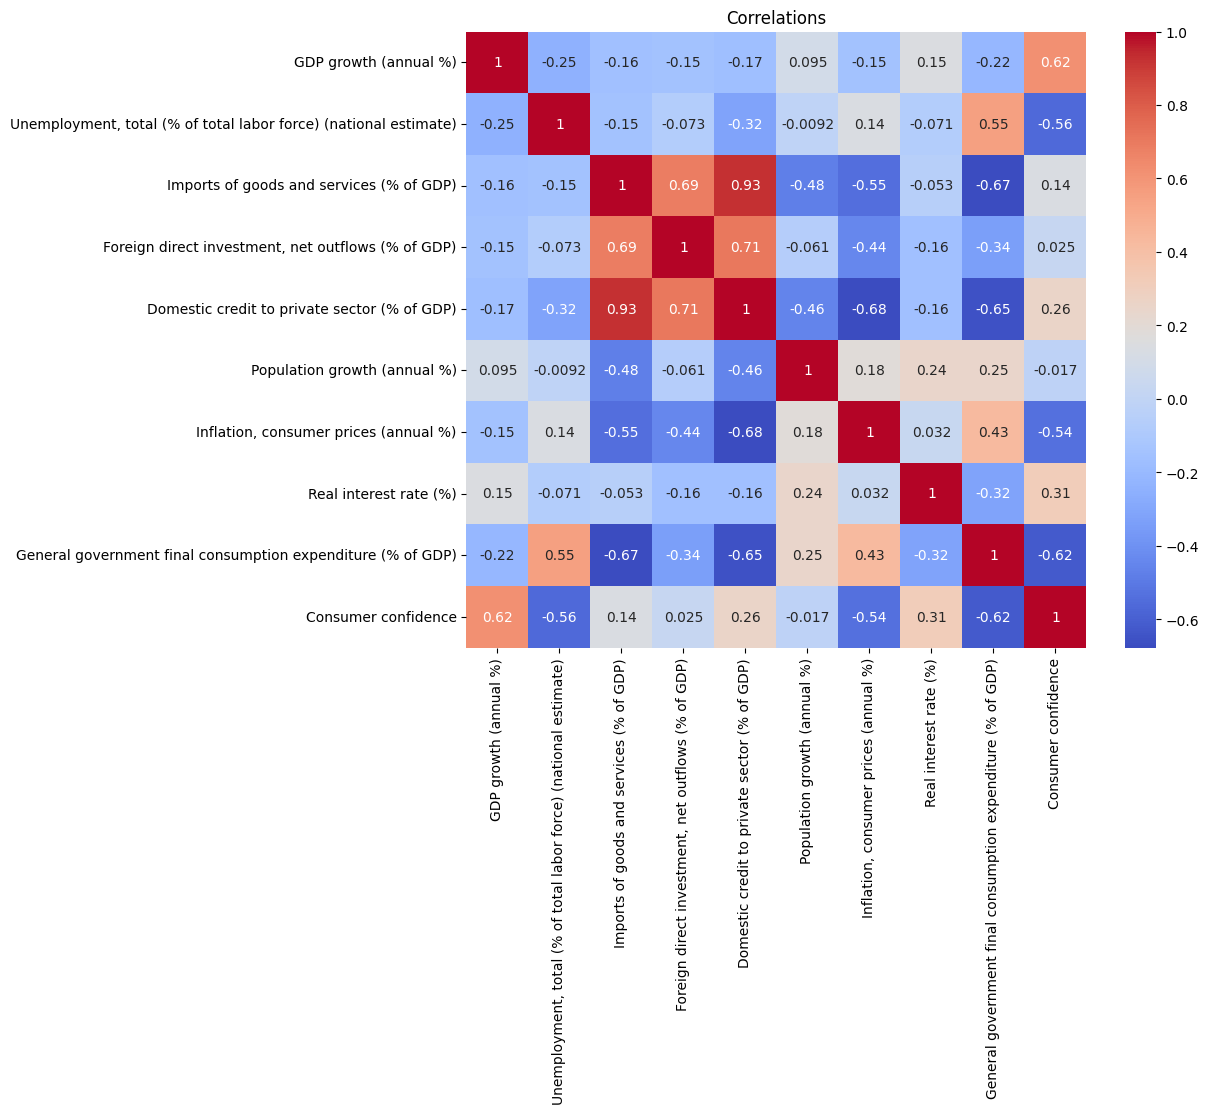

In [99]:
# plot correlation matrix of target and predictors, show values, color by strength
plt.figure(figsize=(10,8))
sns.heatmap(df[[target] + predictors].corr(), annot=True, cmap='coolwarm')
plt.title("Correlations")
plt.show()

Modeling

In [100]:
# scale features to mean 0, std 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [101]:
# split data into train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# define first neural network
mlp1 = MLPRegressor(hidden_layer_sizes=(512, 256), max_iter=3000, random_state=42)

# define second neural network
mlp2 = MLPRegressor(hidden_layer_sizes=(256, 128, 64), max_iter=3000, random_state=42)

In [103]:
# stack the two networks, use another MLP as final estimator
stack = StackingRegressor(estimators=[('mlp1', mlp1), ('mlp2', mlp2)], final_estimator=MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=3000, random_state=42))

# fit stacked model on training data
stack.fit(X_train, y_train)

,"estimators estimators: list of (str, estimator)Base estimators which will be stacked together. Each element of thelist is defined as a tuple of string (i.e. name) and an estimatorinstance. An estimator can be set to 'drop' using `set_params`.","[('mlp1', ...), ('mlp2', ...)]"
,"final_estimator final_estimator: estimator, default=NoneA regressor which will be used to combine the base estimators.The default regressor is a :class:`~sklearn.linear_model.RidgeCV`.",MLPRegressor(...ndom_state=42)
,"cv cv: int, cross-validation generator, iterable, or ""prefit"", default=NoneDetermines the cross-validation splitting strategy used in`cross_val_predict` to train `final_estimator`. Possible inputs forcv are:* None, to use the default 5-fold cross validation,* integer, to specify the number of folds in a (Stratified) KFold,* An object to be used as a cross-validation generator,* An iterable yielding train, test splits,* `""prefit""`, to assume the `estimators` are prefit. In this case, the estimators will not be refitted.For integer/None inputs, if the estimator is a classifier and y iseither binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used.In all other cases, :class:`~sklearn.model_selection.KFold` is used.These splitters are instantiated with `shuffle=False` so the splitswill be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here.If ""prefit"" is passed, it is assumed that all `estimators` havebeen fitted already. The `final_estimator_` is trained on the `estimators`predictions on the full training set and are **not** cross validatedpredictions. Please note that if the models have been trained on the samedata to train the stacking model, there is a very high risk of overfitting... versionadded:: 1.1 The 'prefit' option was added in 1.1.. note:: A larger number of split will provide no benefits if the number of training samples is large enough. Indeed, the training time will increase. ``cv`` is not used for model evaluation but for prediction.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for `fit` of all `estimators`.`None` means 1 unless in a `joblib.parallel_backend` context. -1 meansusing all processors. See :term:`Glossary ` for more details.",None
,"passthrough passthrough: bool, default=FalseWhen False, only the predictions of estimators will be used astraining data for `final_estimator`. When True, the`final_estimator` is trained on the predictions as well as theoriginal training data.",False
,"verbose verbose: int, default=0Verbosity level.",0
,"loss loss: {'squared_error', 'poisson'}, default='squared_error'The loss function to use when training the weights. Note that the""squared error"" and ""poisson"" losses actually implement""half squares error"" and ""half poisson deviance"" to simplify thecomputation of the gradient. Furthermore, the ""poisson"" loss internally usesa log-link (exponential as the output activation function) and requires``y >= 0``... versionchanged:: 1.7 Added parameter `loss` and option 'poisson'.",'squared_error'
,"hidden_layer_sizes hidden_layer_sizes: array-like of shape(n_layers - 2,), default=(100,)The ith element represents the number of neurons in the ithhidden layer.","(512, ...)"
,"activation activation: {'identity', 'logistic', 'tanh', 'relu'}, default='relu'Activation function for the hidden layer.- 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x- 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).- 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).- 'relu', the rectified linear unit function, returns f(x) = max(0, x)",'relu'
,"solver solver: {'lbfgs', 'sgd', 'adam'}, default='adam'The solver for weight optimization.- 'lbfgs' is an optimizer in the family of quasi-Newton methods.- 'sgd' refers to stochastic gradient descent.- 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, 

Evaluation

In [ ]:
# predict on test set
y_pred = stack.predict(X_test)

# metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

In [105]:
# print performance
print("Model Performance:")
print("R² Score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

Model Performance:
R² Score: -0.060819965641991436
MSE: 3.9331136897135592
RMSE: 1.9832079290164104
MAE: 1.1791051095512424


/tmp/ipykernel_60266/1165225955.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y, label='Actual', shade=True)
/tmp/ipykernel_60266/1165225955.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_all_pred, label='Predicted', shade=True)


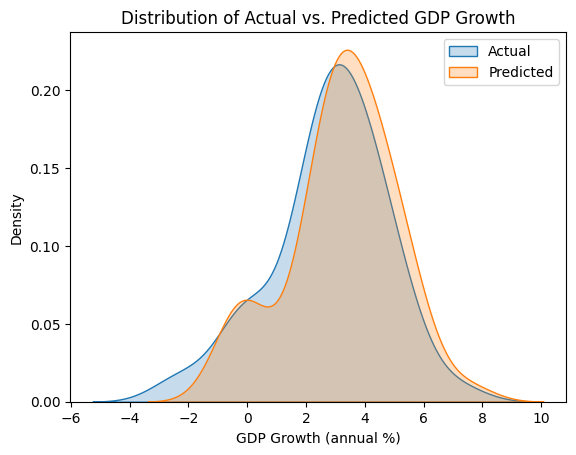

In [106]:
# predict on full dataset
y_all_pred = stack.predict(X_scaled)

# plot distribution of actual vs predicted GDP growth
sns.kdeplot(y, label='Actual', shade=True)
sns.kdeplot(y_all_pred, label='Predicted', shade=True)
plt.title('Distribution of Actual vs. Predicted GDP Growth')
plt.xlabel('GDP Growth (annual %)')
plt.legend()
plt.show()